# Importing the Dataset

In [1]:
import pandas as pd
import re
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Loading the dataset

In [2]:
#read data
disney = pd.read_csv('disney_plus_titles.csv')
disney

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


# Data preparation and cleaning

In [3]:
disney.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [4]:
#overview
disney.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
disney.shape

(1450, 12)

In [7]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [8]:
disney.nunique()

show_id         1450
type               2
title           1450
director         609
cast            1193
country           89
date_added       167
release_year      90
rating             9
duration         158
listed_in        329
description     1448
dtype: int64

#### Dealing with the null values

In [9]:
disney.isnull().values.any()

True

In [10]:
disney.isnull().sum().sum()

888

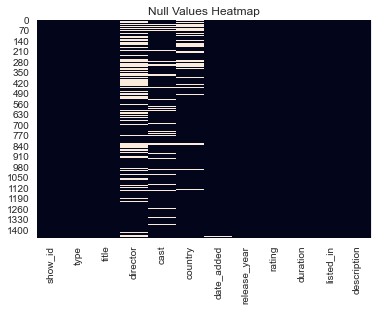

In [11]:
sns.heatmap(disney.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [12]:
disney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [13]:
disney['director'].fillna('No Director', inplace=True)
disney['cast'].fillna('No Cast', inplace=True)
disney['country'].fillna('Country Unavailable', inplace=True)
disney.dropna(subset=['date_added','rating'],inplace=True)

In [14]:
disney.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

### Splitting the dataset
Since the dataset consists of mainly Movies and Shows, I'm splitting the dataset to reflect that.

In [15]:
disney_shows = disney[disney['type']=='TV Show'].copy()
disney_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,TV Show,Hawkeye,No Director,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",Country Unavailable,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,No Director,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,No Director,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",No Director,"Dr. Michelle Oakley, Zachary Fine",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
17,s18,TV Show,Disney Fancy Nancy,No Director,"Mia Jenness, Alyson Hannigan, Rob Riggle, Spen...","United States, Canada","November 12, 2021",2018,TV-PG,3 Seasons,"Animation, Kids",Nancy makes every day extraordinary!


In [16]:
disney_movies = disney[disney['type']=='Movie'].copy()
disney_movies.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Country Unavailable,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Country Unavailable,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Country Unavailable,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...


# Disney Plus Catalogue
This is to see the number of shows and movies on the disney plus catalogue

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


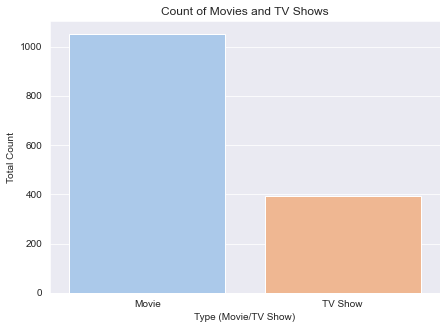

In [17]:
plt.figure(figsize=(7,5))
g = sns.countplot(disney.type, palette="pastel");
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

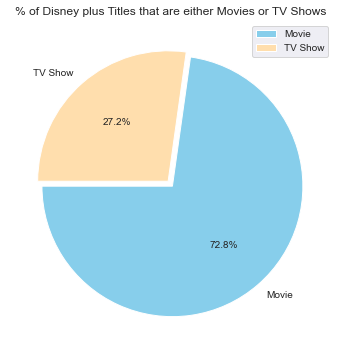

In [18]:
plt.figure(figsize=(12,6))
plt.title("% of Disney plus Titles that are either Movies or TV Shows")
g = plt.pie(disney.type.value_counts(), explode=(0.025,0.025), labels=disney.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

So there are roughly 1,000+ movies and about 280 shows with movies being the majority. This isn't surprising since shows are ongoing and have episodes, but in terms of titles there are far more movie titles (72.8%) than TV show titles (27.2%).

## Disney plus Film Ratings
Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest.

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


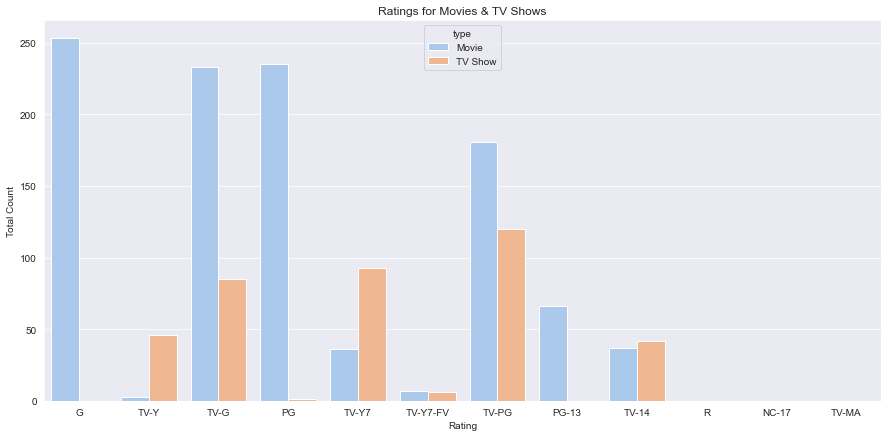

In [19]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(disney.rating, hue=disney.type, order=order, palette="pastel");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\MSI\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


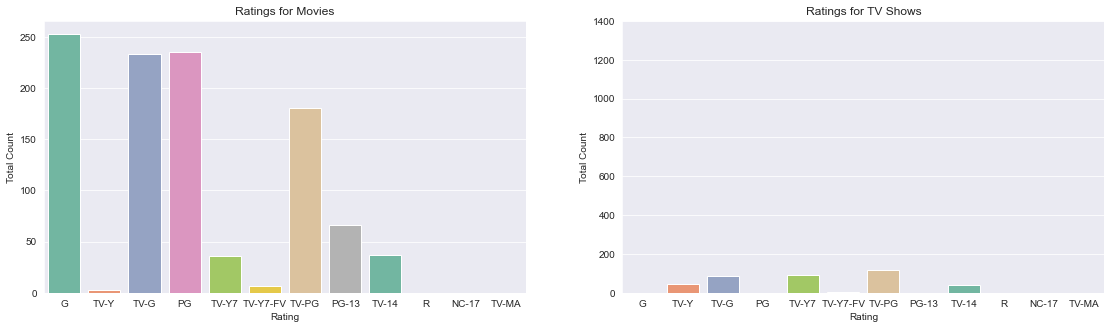

In [20]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(disney_movies.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(disney_shows.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

Overall, there is much more content for the younger audience, especially the movies, this isn't surprising when you think of the history of Disney. 

In [21]:
disney['year_added'] = pd.DatetimeIndex(disney['date_added']).year
disney_movies['year_added'] = pd.DatetimeIndex(disney_movies['date_added']).year
disney_shows['year_added'] = pd.DatetimeIndex(disney_shows['date_added']).year
disney['month_added'] = pd.DatetimeIndex(disney['date_added']).month
disney_movies['month_added'] = pd.DatetimeIndex(disney_movies['date_added']).month
disney_shows['month_added'] = pd.DatetimeIndex(disney_shows['date_added']).month

## Content added each year
Now we will take a look at the amount of content Disney Plus has added since they started in 2019. 

In [22]:
disney_year = disney['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
disney_year = disney_year[disney_year.year != 2022]
disney_year

,year,count
0,2019,765
1,2020,352
2,2021,327


In [26]:
disney_release = disney['release_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','release_year':'count'})
disney_release = disney_release[disney_release.year != 2022]
disney_release

,year,count
0,2021,123
1,2020,114
2,2019,98
3,2017,69
4,2018,65
...,...,...
85,1928,1
86,1944,1
87,1970,1
88,1945,1


I added this to show that even though disney plus started in 2019, Disney has been releasing content from as early as 1928

In [23]:
disney_year2 = disney[['type','year_added']]
movie_year = disney_year2[disney_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2022]
show_year = disney_year2[disney_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2022]

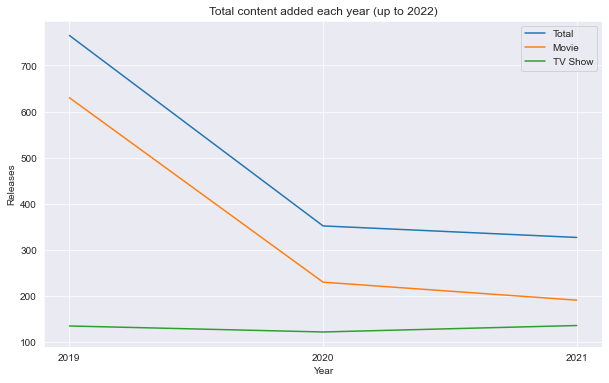

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=disney_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2019, 2022, 1))
plt.title("Total content added each year (up to 2022)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

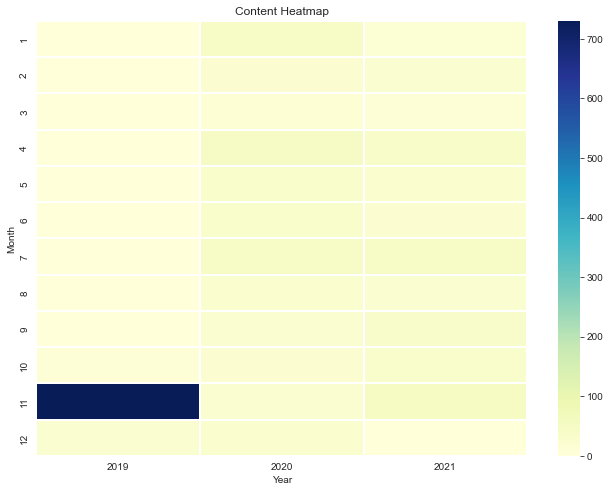

In [27]:
month_year = disney.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()


# Countries with the most content available

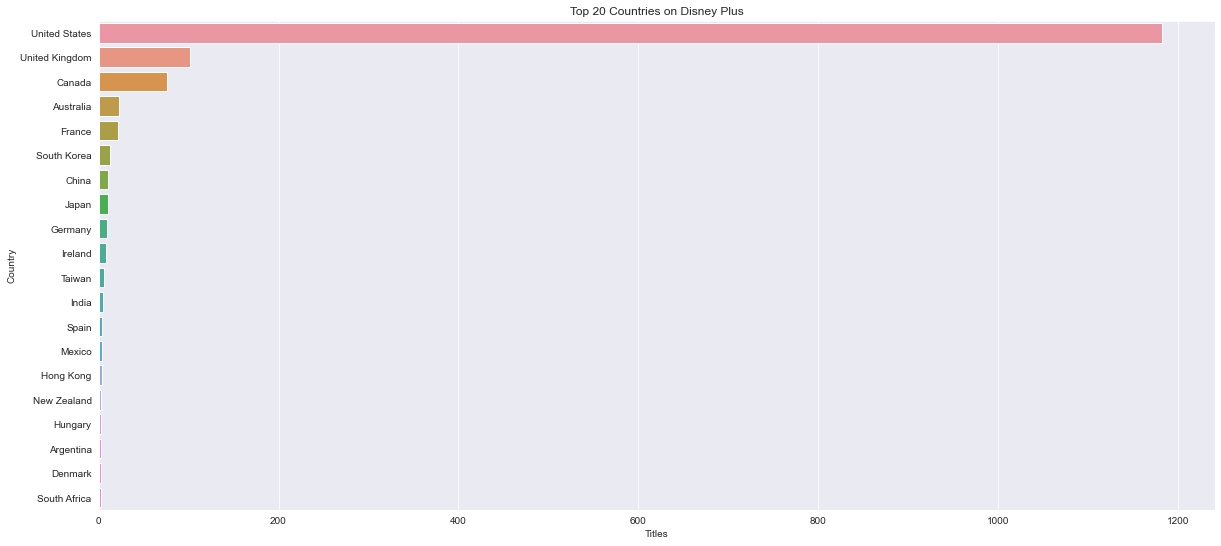

In [46]:
filtered_countries = disney.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(20,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Disney Plus')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

This isn't surpising as Disney Plus is mainly American so the bulk of the content comes from the country. South Africa is the only African country to make an appearance.

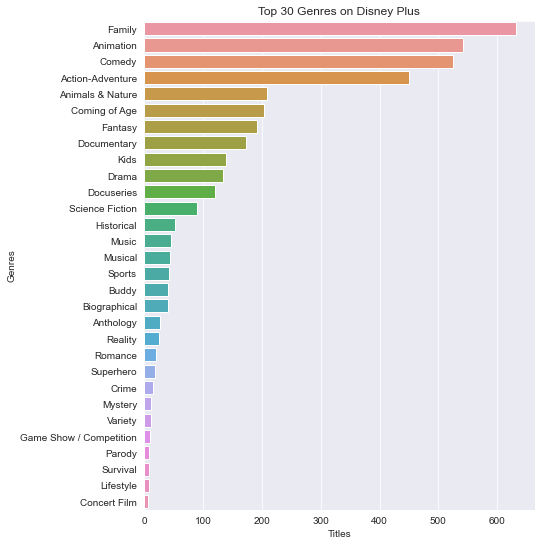

In [31]:
filtered_genres = disney.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:30])
plt.title('Top 30 Genres on Disney Plus')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

Disney is mainly a family streaming service, that shows with the ratings of the movies and shows and it also shows here with the Genres present. It also isn't surprising that animation and comedy round upthe top 3.

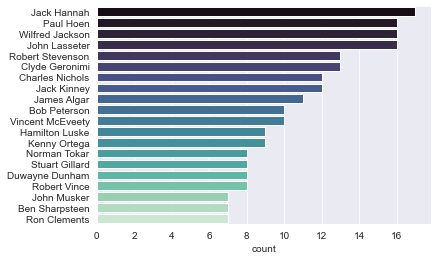

In [37]:
filtered_directors = disney[disney.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:20], palette='mako')
plt.show()


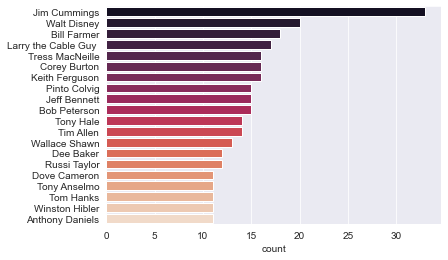

In [38]:
filtered_cast = disney[disney.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:20], palette='rocket')
plt.show()

From these, we can see that the most popular Directors and actors are American which isn't surprising when we take the amount of content from the United States into consideration.

# Inferences and Conclusion
Disney plus is obviously new as it started at November 2019 and we can sy it's still riding on the coattails of disney with the content readily available on the platform. There's not much to be said about Disney plus yet, but it'll be great to see how they move forward and break into new markets, especially the African market.